<a href="https://colab.research.google.com/github/Naimish240/NPTEL-Course-Generator/blob/main/TextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Using ML and DL algorithms for Text Generation.**

---
9th May 2021

Author : [Naimish Mani B](https://www.linkedin.com/in/naimish-balaji-a6182b180/)

---
[Dataset Source](https://nptel.ac.in/noc/noc_courselist.html)

---
Libraries Used:
- BeautifulSoup
- Pandas
- Numpy
- Random
- MatPlotLib
- Seaborn
- Tensorflow / Keras

# **Introuduction**

There are few topics in Machine Learning that make people go "Wow, that's neat!". Text generation is one such concept, wich manages to enchant almost everyone universally. In this project, I implement and evaluate the performance of 3 models (Markov Chain, LSTM and GRU) for the same.

The dataset I have used comes from webscraping the NPTEL Website for the list of all the unique courses they offer. The URL I scraped the data from can be found [here](https://nptel.ac.in/noc/noc_courselist.html).

## Create Dataset

In [2]:
!pip3 install bs4
!pip3 install requests

In [3]:
import requests
import bs4

response = requests.get("https://nptel.ac.in/noc/noc_courselist.html").content
print(len(response))

soup = bs4.BeautifulSoup(response)

1351555


In [4]:
unique = soup.find(id="Unique")
elements = unique.find_all('td')

print((len(elements))/5)
print(elements[-10:])

# We get 1467 rows, which equal to the number of unique elements provided on the website too.

1468.0
[<td>Introduction To Econometrics</td>, <td>Prof. Sabuj Kumar Mandal</td>, <td>IIT Madras</td>, <td>12 weeks</td>, <td><a class="enrol" href="https://nptel.ac.in/courses/130106001/" target="_blank">130106001</a></td>, <td>Environmental &amp; Resource Economics</td>, <td>Prof. Sabuj Kumar Mandal</td>, <td>IIT Madras</td>, <td>12 weeks</td>, <td><a class="enrol" href="https://nptel.ac.in/courses/130106113/" target="_blank">130106113</a></td>]


In [5]:
institute = []
course = []
title_length = []
title_words = []
prof = []
duration = []

for i in range(len(elements)):
  # Add course
  if i % 5 == 0:
    course.append(elements[i].text)
    title_length.append(len(elements[i].text))
    title_words.append(len(elements[i].text.split()))
    continue
  # Add Professor
  if i % 5 == 1:
    prof.append(elements[i].text)
    continue
  # Add Institute
  if i % 5 == 2:
    institute.append(elements[i].text)
    continue
  # Skip, since we don't need link
  if i % 5 == 4:
    continue
  # Add time duration in weeks
  weeks = [int(s) for s in elements[i].text.split() if s.isdigit()]
  if weeks == []:
    duration.append(0)
  else:
    duration.append(weeks[0])


In [6]:
import pandas as pd

df = pd.DataFrame()
df['len_title'] = title_length
df['words_title'] = title_words
df['course'] = course
df['prof'] = prof
df['inst'] = institute
df['weeks'] = duration

print(df.shape)
df.head()

(1468, 6)


,len_title,words_title,course,prof,inst,weeks
0,0,0,,,,0
1,37,4,Introduction To Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,12
2,31,4,Introduction To Aircraft Design,Prof. Rajkumar Pant,IIT Bombay,12
3,50,7,Introduction To Launch Vehicle Analysis And De...,Prof. Ashok Joshi,IIT Bombay,8
4,24,4,Lighter Than Air Systems,Prof. Rajkumar Pant,IIT Bombay,12


In [7]:
# Since first row is null, we get rid of it
df = df.drop(df.index[0])
print(df.shape)
df.head()

(1467, 6)


,len_title,words_title,course,prof,inst,weeks
1,37,4,Introduction To Aerospace Engineering,Prof. Rajkumar Pant,IIT Bombay,12
2,31,4,Introduction To Aircraft Design,Prof. Rajkumar Pant,IIT Bombay,12
3,50,7,Introduction To Launch Vehicle Analysis And De...,Prof. Ashok Joshi,IIT Bombay,8
4,24,4,Lighter Than Air Systems,Prof. Rajkumar Pant,IIT Bombay,12
5,26,3,Introduction To Propulsion,Prof. D. P. Mishra,IIT Kanpur,12


# **EDA**

Now that we've scraped the NPTEL website for the course list, we go about trying to understand the data we're dealing with better through Exploratory Data Analysis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1466 entries, 1 to 1466
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   len_title    1466 non-null   int64 
 1   words_title  1466 non-null   int64 
 2   course       1466 non-null   object
 3   prof         1466 non-null   object
 4   inst         1466 non-null   object
 5   weeks        1466 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 80.2+ KB


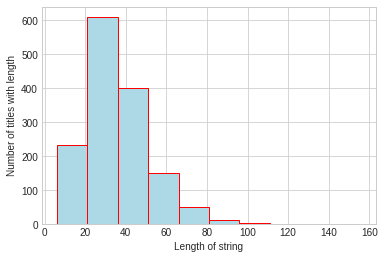

In [ ]:
plt.style.use('seaborn-whitegrid')

# Plot title length
df['len_title'].hist(figsize=(6, 4), color='lightblue', edgecolor='red')
plt.xlabel("Length of string")
plt.ylabel("Number of titles with length")
plt.show()

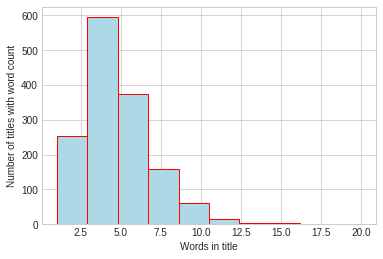

In [ ]:
df['words_title'].hist(figsize=(6, 4), color='lightblue', edgecolor='red')
plt.xlabel("Words in title")
plt.ylabel("Number of titles with word count")
plt.show()

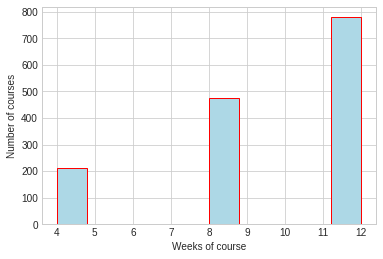

In [ ]:
df['weeks'].hist(figsize=(6, 4), color='lightblue', edgecolor='red')
plt.xlabel("Weeks of course")
plt.ylabel("Number of courses")
plt.show()

In [ ]:
print("Number of Unique Professors: ", len(pd.unique(df.prof)))
print("Number of Unique Institutes: ", len(pd.unique(df.inst)))

Number of Unique Professors:  1082
Number of Unique Institutes:  59


[[104, 'IIT Bombay'], [234, 'IIT Kanpur'], [328, 'IIT Kharagpur'], [255, 'IIT Madras'], [71, 'IISc Bangalore'], [131, 'IIT Guwahati'], [155, 'IIT Roorkee'], [2, 'IIT(BHU) Varanasi'], [3, 'IIT Tirupati'], [58, 'IIT Delhi'], [6, 'IISER Mohali'], [11, 'IISER Pune'], [2, 'IISER PUNE'], [8, 'IISER Bhopal'], [1, 'NCL Pune, IISER Pune'], [1, 'IIIT Hyderabad'], [1, 'PSG Tech., Coimbatore MBCET, Trivandrum SRM IST'], [5, 'IIT Roorkee '], [6, 'IIIT Bangalore'], [6, 'IIT Patna'], [1, 'IIT KGP & Google'], [8, 'Chennai Mathematical Institute'], [5, 'IIIT Delhi'], [4, 'IIT Ropar'], [1, 'IIT Ropar & IIT Gandhinagar'], [2, 'KTH Royal Institute of Technology, Sweden'], [1, 'IIT Madras & Google'], [1, 'Persistent Computing Systems & CMI'], [7, 'IIT Hyderabad'], [1, 'IIT Gandhinagar\nIMSC'], [1, 'IIT Gandhinagar'], [1, 'IBM and IITM'], [1, 'IIITB'], [1, 'Netaji Subhas University of Technology\nand\nIIT Jammu'], [4, 'IIT Mandi'], [1, 'Visva Bharati University, Santiniketan'], [1, 'Visva-Bharati University

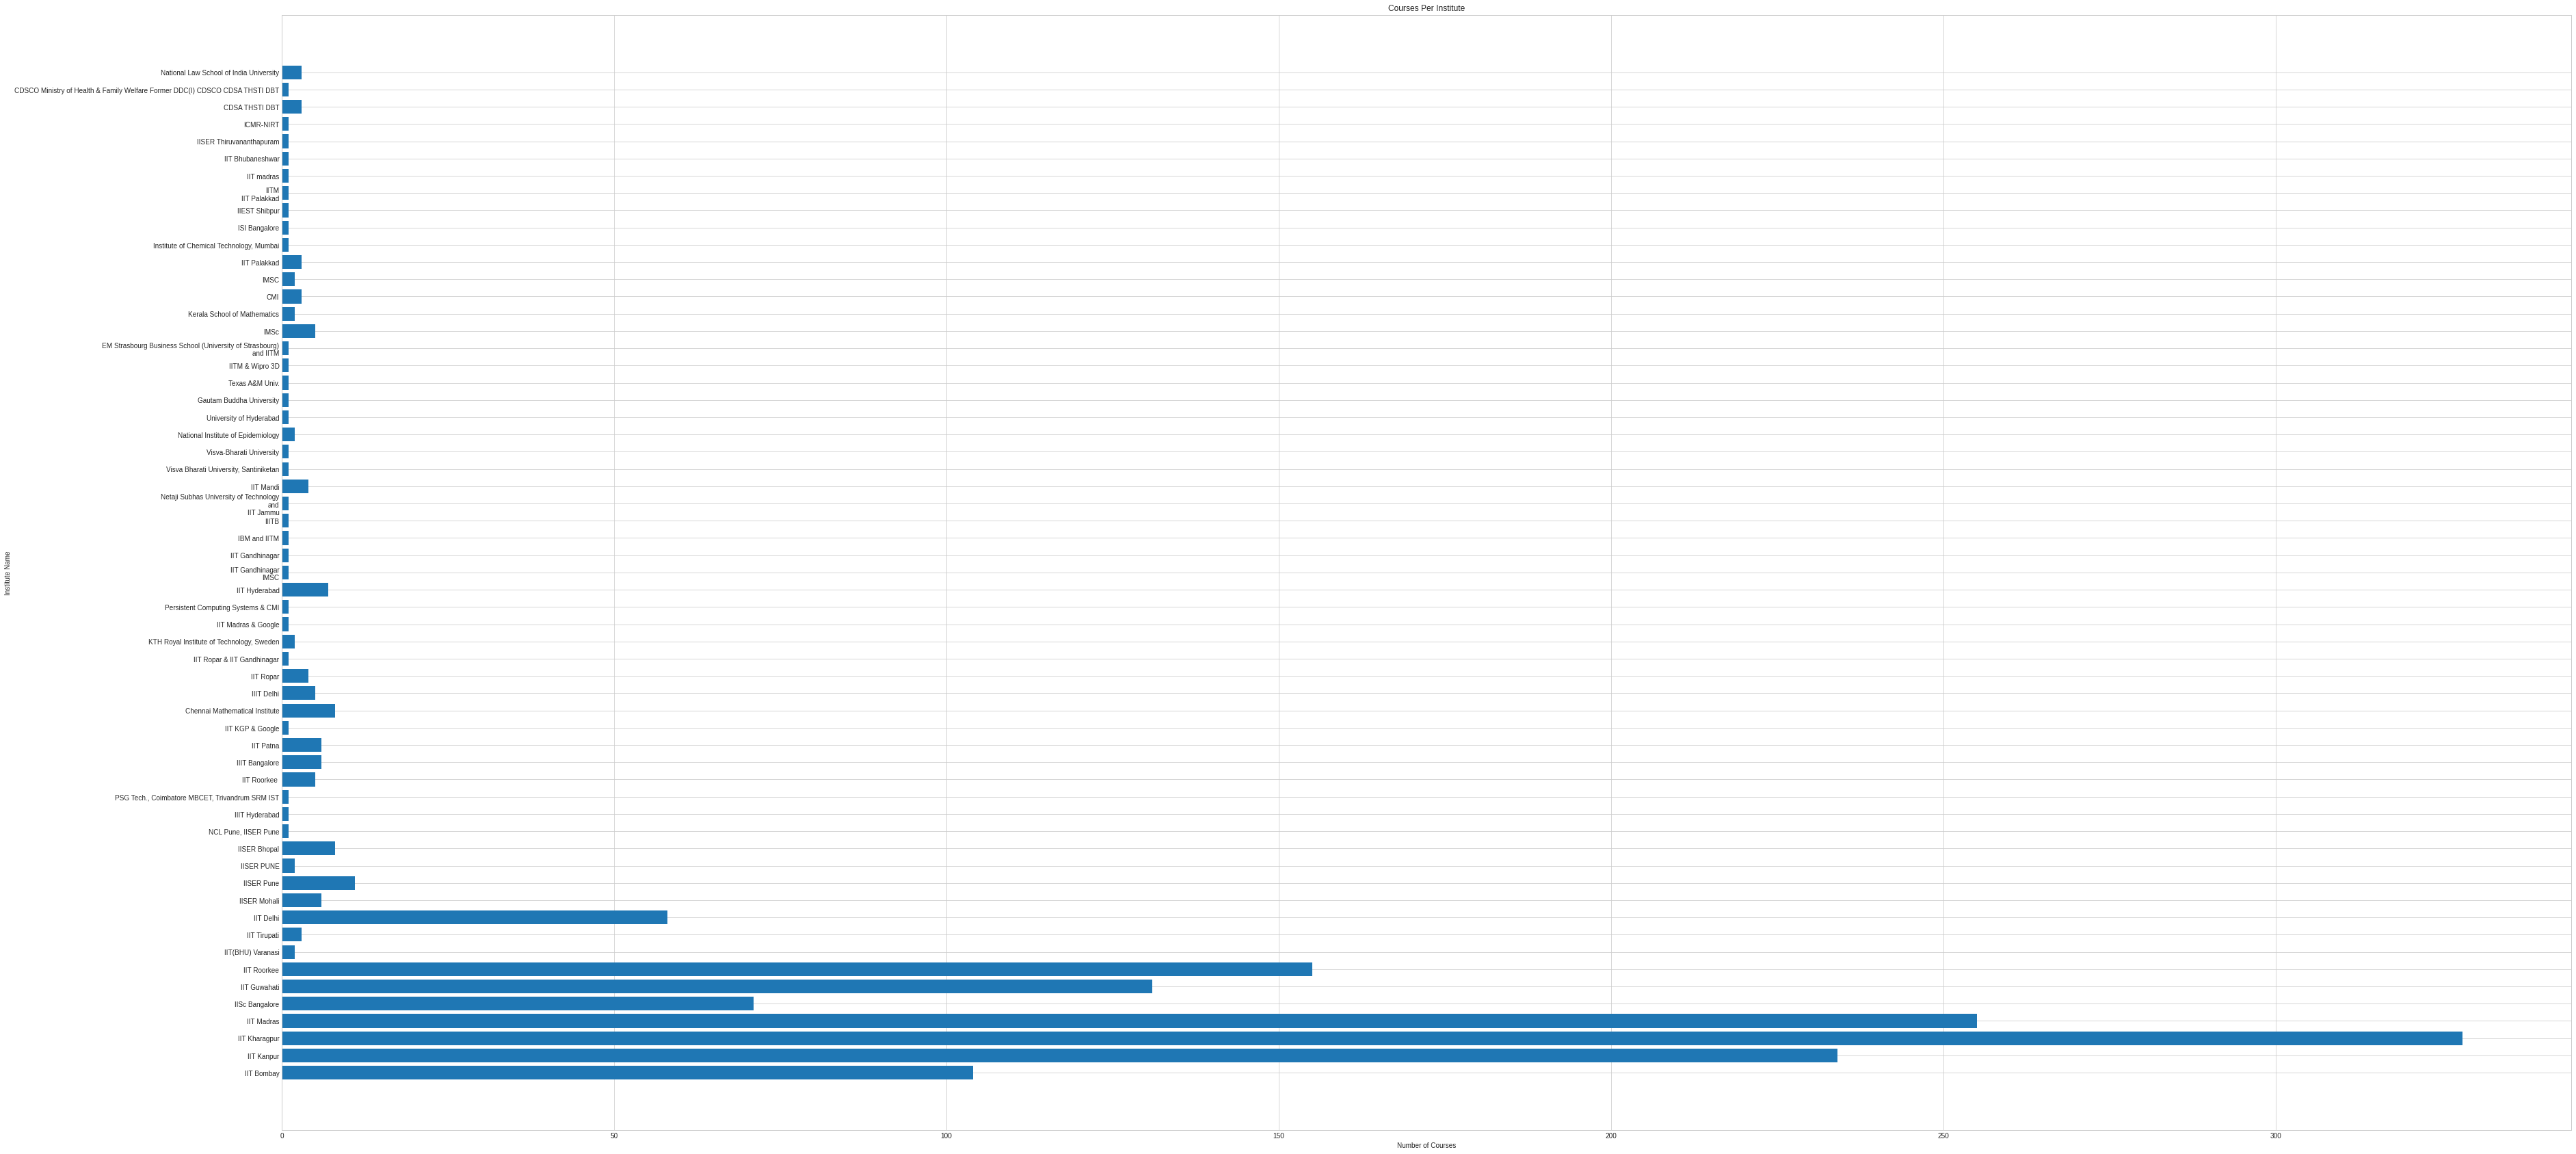

In [ ]:
courses_per_institute = [[len(df[df.inst == i]), i] for i in pd.unique(df.inst)]
x_axis = [i[0] for i in courses_per_institute]
y_axis = [i[1] for i in courses_per_institute]

print(courses_per_institute)

plt.figure(figsize=(60, 30))
plt.barh(y_axis,x_axis)
plt.title('Courses Per Institute')
plt.ylabel('Institute Name')
plt.xlabel('Number of Courses')
plt.show()

[[53, 3], [834, 1], [158, 2], [30, 4], [5, 5], [2, 6]]


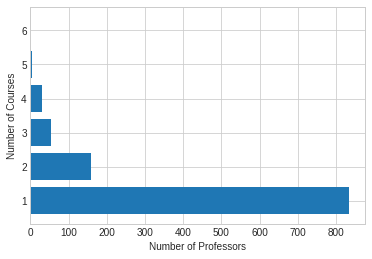

In [ ]:
courses_per_prof = [[len(df[df.prof == i]), i] for i in pd.unique(df.prof)]
foo_1 = [i[0] for i in courses_per_prof]
foo_2 = [i[1] for i in courses_per_prof]

temp_df = pd.DataFrame()
temp_df['1'] = foo_1
temp_df['2'] = foo_2

prof_courses_count = [[len(temp_df[temp_df['1'] == i]), i] for i in pd.unique(temp_df['1'])]
x_axis = [i[0] for i in prof_courses_count]
y_axis = [i[1] for i in prof_courses_count]

print(prof_courses_count)

plt.figure(figsize=(6, 4))
plt.barh(y_axis,x_axis)
plt.ylabel('Number of Courses')
plt.xlabel('Number of Professors')
plt.show()

# **Models**

## Markov Chain

Basically, a Markov Chain is a datastructure that, for a given event, tries to tell us the probability of each subsequent event occuring. In the context of NLP, these models have been used traditionally for both text generation and autocompletion.

To build a Markov Chain, we require a set of distinct states. Here, we use Byte Pair Encoding to determine all possible states. BPE was chosen because it is a very popular encoding scheme that strikes a good balance between character level embeddings and word level embeddings. 


### Byte Pair Encoding

In [ ]:
import re
from collections import Counter, defaultdict

In [ ]:
def build_vocab(corpus):
    # Separate each char in word by space and add mark end of token
    tokens = [" ".join(word) + " </w>" for word in corpus.split()]
    # Count frequency of tokens in corpus
    vocab = Counter(tokens)  
    return vocab

def get_stats(vocab):
    pairs = defaultdict(int)
    for word, frequency in vocab.items():
        symbols = word.split()

        # Counting up occurrences of pairs
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += frequency

    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    
    for word in v_in:
        # replace most frequent pair in all vocabulary
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]

    return v_out

In [ ]:
# Modified from https://leimao.github.io/blog/Byte-Pair-Encoding/
import re, collections

def get_vocab(text):
    vocab = collections.defaultdict(int)
    for line in text:
        words = line.strip().lower().split()
        for word in words:
            vocab[' '.join(list(word)) + ' </w>'] += 1

    return vocab

def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

def get_tokens_from_vocab(vocab):
    tokens_frequencies = collections.defaultdict(int)
    vocab_tokenization = {}
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens_frequencies[token] += freq
        vocab_tokenization[''.join(word_tokens)] = word_tokens
    return tokens_frequencies, vocab_tokenization

def measure_token_length(token):
    if token[-4:] == '</w>':
        return len(token[:-4]) + 1
    else:
        return len(token)

def tokenize_word(string, sorted_tokens, unknown_token='</u>'):
    
    if string == '':
        return []
    if sorted_tokens == []:
        return [unknown_token]

    string_tokens = []
    for i in range(len(sorted_tokens)):
        token = sorted_tokens[i]
        token_reg = re.escape(token.replace('.', '[.]'))

        matched_positions = [(m.start(0), m.end(0)) for m in re.finditer(token_reg, string)]
        if len(matched_positions) == 0:
            continue
        substring_end_positions = [matched_position[0] for matched_position in matched_positions]

        substring_start_position = 0
        for substring_end_position in substring_end_positions:
            substring = string[substring_start_position:substring_end_position]
            string_tokens += tokenize_word(string=substring, sorted_tokens=sorted_tokens[i+1:], unknown_token=unknown_token)
            string_tokens += [token]
            substring_start_position = substring_end_position + len(token)
        remaining_substring = string[substring_start_position:]
        string_tokens += tokenize_word(string=remaining_substring, sorted_tokens=sorted_tokens[i+1:], unknown_token=unknown_token)
        break
    return string_tokens

In [ ]:
vocab = get_vocab(course)

print('Tokens Before BPE')
tokens_frequencies, vocab_tokenization = get_tokens_from_vocab(vocab)
print('All tokens: {}'.format(tokens_frequencies.keys()))
print('Number of tokens: {}'.format(len(tokens_frequencies.keys())))

Tokens Before BPE
All tokens: dict_keys(['i', 'n', 't', 'r', 'o', 'd', 'u', 'c', '</w>', 'a', 'e', 's', 'p', 'g', 'f', 'l', 'h', 'v', 'y', 'm', 'b', '&', 'x', '-', '(', '2', ')', 'w', 'k', ':', 'q', 'z', 'j', 'â', '®', "'", '.', '1', ';', '/', '+', '4', '0', '3', '5', '7', '9', '8'])
Number of tokens: 48


In [ ]:
num_merges = 2501
for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    if i % 250 == 0:
      print('Iter: {}'.format(i))
      print('Best pair: {}'.format(best))
      tokens_frequencies, vocab_tokenization = get_tokens_from_vocab(vocab)
      print('All tokens: {}'.format(tokens_frequencies.keys()))
      print('Number of tokens: {}'.format(len(tokens_frequencies.keys())))

Iter: 0
Best pair: ('i', 'n')
All tokens: dict_keys(['in', 't', 'r', 'o', 'd', 'u', 'c', 'i', 'n', '</w>', 'a', 'e', 's', 'p', 'g', 'f', 'l', 'h', 'v', 'y', 'm', 'b', '&', 'x', '-', '(', '2', ')', 'w', 'k', ':', 'q', 'z', 'j', 'â', '®', "'", '.', '1', ';', '/', '+', '4', '0', '3', '5', '7', '9', '8'])
Number of tokens: 49
Iter: 250
Best pair: ('it', 's</w>')
All tokens: dict_keys(['introduction</w>', 'to</w>', 'a', 'er', 'o', 'sp', 'ac', 'e</w>', 'engineering</w>', 'ir', 'c', 'ra', 'f', 't</w>', 'design</w>', 'l', 'un', 'ch', '</w>', 'v', 'e', 'h', 'ic', 'le</w>', 'analysis</w>', 'and</w>', 'i', 'g', 't', 'er</w>', 'th', 'an</w>', 'systems</w>', 'pro', 'p', 'ul', 'sion</w>', 'pl', 'an', 'per', 'for', 'man', 'ce</w>', 'sta', 'bility</w>', 'control</w>', 'mod', 'ynamics</w>', 'd', 'ynam', 'ic</w>', '&</w>', 'u', 'ment', 'ation</w>', 'system</w>', 'ci', 'ent</w>', 'in', 'di', 'technology</w>', 'ex', 'eri', 's</w>', 'in</w>', 'fl', 'fundamentals</w>', 'of</w>', 'com', 'b', 'us', 'tion</w>'

In [ ]:
sorted_tokens_tuple = sorted(tokens_frequencies.items(), key=lambda item: (measure_token_length(item[0]), item[1]), reverse=True)
sorted_tokens = [token for (token, freq) in sorted_tokens_tuple]
print(sorted_tokens)
print(sorted_tokens_tuple)

['mechanics/geotechnical</w>', 'bioelectrochemistry</w>', 'evaluation(part-1)</w>', 'biopharmaceutical</w>', 'characterization</w>', 'entrepreneurship</w>', 'electromagnetics</w>', 'biomicrofluidics</w>', 'multidimensional</w>', 'geoenvironmental</w>', 'electromagnetic</w>', 'instrumentation</w>', 'electrochemical</w>', 'thermodynamics:</w>', 'stereochemistry</w>', 'crystallography</w>', 'microprocessors</w>', 'learner-centric</w>', 'bioengineering:</w>', 'bioinformatics:</w>', 'nanofabrication</w>', 'intensification</w>', 'organometallics</w>', 'retrosynthesis:</w>', 'problem-solving</w>', 'geotechnology);</w>', 'thermodynamics</w>', 'communications</w>', 'sustainability</w>', 'transportation</w>', 'nanotechnology</w>', 'organometallic</w>', 'infrastructure</w>', 'representation</w>', 'transformation</w>', 'organizational</w>', 'interactomics:</w>', 'mechanobiology</w>', 'proteogenomics</w>', 'cardiovascular</w>', 'time-frequency</w>', 'pharmaceutical</w>', 'intermediates:</w>', 'phot

### Building the Model


In [ ]:
def get_word_tokens(word):
  foo = tokenize_word(string=word, sorted_tokens=sorted_tokens, unknown_token='</u>')
  foo.append('</eol>')
  return foo

markov_dict = {}

'''
markov_dict 
{
  'token' : {
              'subsequent token' : count
            },
  ...
}
'''
print(markov_dict)

{}


In [ ]:
lower_line = df.course[1].lower()
print(df.course[1].lower())
get_word_tokens(lower_line)

introduction to aerospace engineering


['introduc',
 'tion',
 'to',
 'a',
 'e',
 'ro',
 'sp',
 'ac',
 'e',
 'engineering',
 '</eol>']

In [ ]:
for line in df.course:
  lower_line = line.lower()
  line_tokens = get_word_tokens(lower_line)

  for i in range(len(line_tokens)-1):
    token = line_tokens[i]
    next_token = line_tokens[i+1]
    # If token not in dict
    if token not in markov_dict.keys():
      markov_dict[token] = {next_token : 1}
      continue
    # If subsequent token not in dict
    if next_token not in markov_dict[token].keys():
      markov_dict[token][next_token] = 1
      continue
    # Subseuent token in dict
    markov_dict[token][next_token] += 1

In [ ]:
print(markov_dict.keys())
len(markov_dict.keys())

dict_keys(['introduc', 'tion', 'to', 'a', 'e', 'ro', 'sp', 'ac', 'engineering', 'air', 'c', 'raf', 't', 'des', 'ig', 'n', 'la', 'un', 'ch', 'vehic', 'l', 'analy', 's', 'is', 'and', 'igh', 'er', 'th', 'an', 'y', 'stem', 'pro', 'p', 'ul', 'sion', 'plan', 'per', 'form', 'anc', 'st', 'bil', 'it', 'control', 'mod', 'am', 'ic', 'd', 'ug', 'ment', 'ation', 'i', 'ent', 'in', 'di', 'technolog', 'experiment', 'fl', 'f', 'und', 'al', 'o', 'combus', '-', 'ma', 'int', 'en', '(', 'part', '2', 'fi', 'ed', 'w', 'ing', 'man', 'eri', 'es', 'fin', 'vol', 'um', 'method', 'ad', 'v', 'k', 'et', 'u', 'b', 're', 'ath', 'comput', 'sci', 'enc', 'at', 'ell', 'titu', 'de', 'vibr', 'struc', 'tur', 'mechan', 'g', 'ine', 'as', ':', 'application', 'prot', 'ins', '</u>', 'el', 'om', 'm', 'spectr', 'met', 'r', 'inter', 'ar', 'ys', 'bio', 'sens', 'or', 'tis', 'tic', 'olog', 'ema', 'for', 'fac', 'h', 'me', 'us', 'gen', 'si', 'theory', 'im', 'hy', 'electr', 'mo', 'ec', 'erg', 'cultur', 'biom', 'etr', 'prof', 'communic', '

452

### Generating the text

In [ ]:
import random
print("-------------------------------------------")
print("Randomly select next token")
print("-------------------------------------------")

for i in range(10):
  line = []
  # Select random word
  word = random.sample(markov_dict.keys(), 1)
  #print(word, markov_dict[word[0]])
  while len(line) < 10:
    #print(line)
    #print(markov_dict[word[0]])
    # Sample next word
    if word[0] == '</eol>':
      break
    line.append(word)
    word = random.sample(markov_dict[word[0]].keys(), 1)
  print(' '.join([i[0] for i in line]))

-------------------------------------------
Randomly select next token
-------------------------------------------
la st u e communic ation technolog i tal communic
centr ic sh ell program s ad b or at
en g is tic w ell ing und ar vibr
tra c e w w at ab as in l
fl u ar th on for t : i
it es ul ing trans m comput ing sci ent
analy s conv ol ev el ed prob a :
sup por t diagno s c ep de al o
rec t develop ment pro ces and pe buil d
def ine ar go og l ex plan e neuro


In [ ]:
print("-------------------------------------------")
print("Selecting Most Likely next Token")
print("-------------------------------------------")

for i in range(10):
  line = []
  # Select random word
  word = random.sample(markov_dict.keys(), 1)[0]
  #print(word, markov_dict[word[0]])
  while len(line) < 10:
    # Sample next word
    if word == '</eol>':
      break
    line.append(word)
    word = max([(key, value) for key, value in markov_dict[word].items()])[0]

  print(' '.join([i for i in line]))

-------------------------------------------
Selecting Most Likely next Token
-------------------------------------------
polym er y work sh or y work sh or
po th steel struc tur es us tic work sh
ins ul us tic work sh or y work sh
trol eu tic work sh or y work sh or
prac tic work sh or y work sh or y
ea sur ro v trans por t y work sh
projec tion trans por t y work sh or y
ar y work sh or y work sh or y
ph olog y work sh or y work sh or
it y work sh or y work sh or y


As we can see from above, the random selection method yields better results than selecting the most likely token. This is partially because of the formation of a "closed loop" path between the nodes ["work", "sh", "or", "y"]. Hence, randomly selecting nodes appears to work better in this context.

##LSTM

Developed in 1997, an LSTM is a Deep Recurrant Neural Network that was designed to work with sequential data. Here, we're modifying the corpus and training the model to predict the output, one character at a time.

### Generate Corpus

In [39]:
import re

corpus = course[1:]
text = []

for s in corpus:
    # Remove all special characters
    s = re.sub(r'\W', ' ', s)
    # Remove all single characters
    s = re.sub(r'\s+[a-zA-Z]\s+', ' ', s)
    # Remove single characters from the start
    s = re.sub(r'\^[a-zA-Z]\s+', ' ', s)
    # Substituting multiple spaces with single space
    s = re.sub(r'\s+', ' ', s, flags=re.I)
    # Removing prefixed 'b'
    s = re.sub(r'^b\s+', '', s)
    # Converting to Lowercase
    s = s.lower()

    # Add line to text
    text.append(s)

text[0]

'introduction to aerospace engineering'

In [40]:
text = ' '.join(text)
print("Corpus length:", len(text))
text[:70]

Corpus length: 52990


'introduction to aerospace engineering introduction to aircraft design '

In [41]:
import numpy as np

chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Total chars: 36
Number of sequences: 17650


### The Model

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
model = keras.Sequential(
    [
        keras.Input(shape=(maxlen, len(chars))),
        layers.LSTM(128),
        layers.Dense(len(chars), activation="softmax"),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)

### Generating the text

In [43]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

### Run the stuff

In [45]:
import random

epochs = 25
batch_size = 128

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print()
    print("Generating text after epoch: %d" % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.5, 1.0, 1.2]:
        print("Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + maxlen]

        for i in range(50):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        print("Generated Text : ", generated)
        print()

138/138 [==============================] - 1s 6ms/step - loss: 0.8787

Generating text after epoch: 0
Diversity: 0.5
Generated Text :  matermana gro businervical menablynit condustainab

Diversity: 1.0
Generated Text :  biomena trotelsion tesaniment applications implexi

Diversity: 1.2
Generated Text :  psyms symnesistriative prodainity ato machilisyst 

138/138 [==============================] - 1s 6ms/step - loss: 0.8324

Generating text after epoch: 1
Diversity: 0.5
Generated Text :   and sichanical analysis in ber clinical algorithm

Diversity: 1.0
Generated Text :   mechanics groupmenic innoganizati electrocovaicar

Diversity: 1.2
Generated Text :   applications instvaty for electromogre blaking ii

138/138 [==============================] - 1s 6ms/step - loss: 0.8174

Generating text after epoch: 2
Diversity: 0.5
Generated Text :  al sechnology ge ment and design production to mac

Diversity: 1.0
Generated Text :  tion to convorcenin  and fundaments  decision and 

Diversity: 1.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Generated Text :  ring for economics introduction to psystics and da

Diversity: 1.0
Generated Text :  ring select abshore production of water sumphograp

Diversity: 1.2
Generated Text :  ring basic ts fundamentals of spocting materials i



## GRU

A GRU is a modern take on the LSTM. By modifying some of the initial assumptions made by the LSTM, the GRU manages to outperform the traditional LSTM by training faster and getting more accurate results, more often than not.

### Building the Model

In [46]:
model = keras.Sequential(
    [
        keras.Input(shape=(maxlen, len(chars))),
        layers.GRU(128),
        layers.Dense(len(chars), activation="softmax"),
    ]
)
optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)

### Generating the text

In [47]:
epochs = 25
batch_size = 128

for epoch in range(epochs):
    model.fit(x, y, batch_size=batch_size, epochs=1)
    print()
    print("Generating text after epoch: %d" % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print("Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + maxlen]

        for i in range(50):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char

        print("Generated Text: ", generated)
        print()

138/138 [==============================] - 3s 6ms/step - loss: 2.2375

Generating text after epoch: 0
Diversity: 0.2
Generated Text:  nd chemics in engineering systems and mentar corn 

Diversity: 0.5
Generated Text:  r eesing proched star sundige engine gronces and i

Diversity: 1.0
Generated Text:  l fantiume uisthatiod ses in grame wand in eptomal

Diversity: 1.2
Generated Text:  ls te letrateonch tecs malign rfatvods arp roled c

138/138 [==============================] - 1s 5ms/step - loss: 1.6014

Generating text after epoch: 1
Diversity: 0.2
Generated Text:   mechanics and mineration materials and metrodscie

Diversity: 0.5
Generated Text:   engineering and technolog tronals son materials f

Diversity: 1.0
Generated Text:   mechanics of materi ment atar ectice engroe metho

Diversity: 1.2
Generated Text:   cessems for mitecs nethon baip teelelplel proproe

138/138 [==============================] - 1s 5ms/step - loss: 1.3340

Generating text after epoch: 2
Diversity: 0.2
Generat

# **Conclusion**

Based off of our three models, here are a couple of plausible courses that were generated:

Markov Chain:
  - development proces and pe build
  - centric shell programs

LSTM:
  - introduction to power systems biometallic concep
  - basics of management analysis and perspective 
  - on systems application systems in engineering

GRU:
  - introduction to learning and analytics for estami
  - for statistics of materials biointroduction
  - management security devices thermodynamics math